# Working With Text Data

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype('float')

# Upper( ) and Lower( )

In [6]:
titanic.name.astype("string")

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: string

In [8]:
titanic['name'].str.upper()

0                         ALLEN, MISS. ELISABETH WALTON
1                        ALLISON, MASTER. HUDSON TREVOR
2                          ALLISON, MISS. HELEN LORAINE
3                  ALLISON, MR. HUDSON JOSHUA CREIGHTON
4       ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)
                             ...                       
1304                               ZABOUR, MISS. HILENI
1305                              ZABOUR, MISS. THAMINE
1306                          ZAKARIAN, MR. MAPRIEDEDER
1307                                ZAKARIAN, MR. ORTIN
1308                                 ZIMMERMAN, MR. LEO
Name: name, Length: 1309, dtype: object

In [11]:
titanic['lower_name'] = titanic['name'].str.lower()

In [13]:
titanic.lower_name.str.capitalize()

0                         Allen, miss. elisabeth walton
1                        Allison, master. hudson trevor
2                          Allison, miss. helen loraine
3                  Allison, mr. hudson joshua creighton
4       Allison, mrs. hudson j c (bessie waldo daniels)
                             ...                       
1304                               Zabour, miss. hileni
1305                              Zabour, miss. thamine
1306                          Zakarian, mr. mapriededer
1307                                Zakarian, mr. ortin
1308                                 Zimmerman, mr. leo
Name: lower_name, Length: 1309, dtype: object

In [16]:
titanic['deck'] = titanic['cabin'].str[0]

In [17]:
titanic.groupby('deck').mean()

,pclass,survived,age,sibsp,parch,fare
deck,,,,,,
?,2.617357,0.302761,27.406654,0.503945,0.367850,19.132707
A,1.000000,0.500000,44.157895,0.181818,0.181818,41.244314
B,1.000000,0.723077,36.476190,0.446154,0.661538,122.383078
C,1.000000,0.606383,38.382752,0.680851,0.414894,107.926598
D,1.130435,0.695652,39.702381,0.413043,0.260870,53.007339
E,1.243902,0.731707,38.118421,0.341463,0.390244,54.564634
F,2.380952,0.619048,21.333333,0.428571,0.523810,18.079367
G,3.000000,0.600000,12.000000,0.600000,1.200000,14.205000
T,1.000000,0.000000,45.000000,0.000000,0.000000,35.500000


<AxesSubplot:xlabel='deck'>

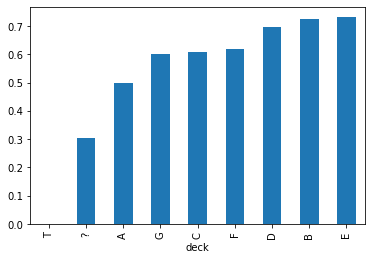

In [20]:
titanic.groupby('deck')['survived'].mean().sort_values().plot(kind='bar')

In [21]:
s = pd.Series(['1. Hawk.  ', '2. Pickle!\n', '3. Melonhead?\t'])

In [22]:
s

0         1. Hawk.  
1       2. Pickle!\n
2    3. Melonhead?\t
dtype: object

In [23]:
s.str.strip()

0         1. Hawk.
1       2. Pickle!
2    3. Melonhead?
dtype: object

In [28]:
s.str.strip(to_strip='123. \n \t ? !')

0         Hawk
1       Pickle
2    Melonhead
dtype: object

In [29]:
s.str.rstrip()

0         1. Hawk.
1       2. Pickle!
2    3. Melonhead?
dtype: object

In [32]:
s.str.lstrip(to_strip='123.')

0          Hawk.  
1        Pickle!\n
2     Melonhead?\t
dtype: object

# split()

In [36]:
titanic['home.dest'].str.split("/", expand=True)

,0,1,2
0,"St Louis, MO",None,None
1,"Montreal, PQ","Chesterville, ON",None
2,"Montreal, PQ","Chesterville, ON",None
3,"Montreal, PQ","Chesterville, ON",None
4,"Montreal, PQ","Chesterville, ON",None
...,...,...,...
1304,?,None,None
1305,?,None,None
1306,?,None,None
1307,?,None,None


In [38]:
titanic['home'] = titanic['home.dest'].str.split("/", expand=True)[0]

In [39]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_name,deck,home
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO","allen, miss. elisabeth walton",B,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","allison, master. hudson trevor",C,"Montreal, PQ"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, miss. helen loraine",C,"Montreal, PQ"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","allison, mr. hudson joshua creighton",C,"Montreal, PQ"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, mrs. hudson j c (bessie waldo daniels)",C,"Montreal, PQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,"zabour, miss. hileni",?,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,"zabour, miss. thamine",?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,"zakarian, mr. mapriededer",?,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,"zakarian, mr. ortin",?,?


In [40]:
titanic['destination'] = titanic['home.dest'].str.split("/", expand=True)[1]

In [41]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_name,deck,home,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO","allen, miss. elisabeth walton",B,"St Louis, MO",None
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","allison, master. hudson trevor",C,"Montreal, PQ","Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, miss. helen loraine",C,"Montreal, PQ","Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","allison, mr. hudson joshua creighton",C,"Montreal, PQ","Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, mrs. hudson j c (bessie waldo daniels)",C,"Montreal, PQ","Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,"zabour, miss. hileni",?,?,None
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,"zabour, miss. thamine",?,?,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,"zakarian, mr. mapriededer",?,?,None
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,"zakarian, mr. ortin",?,?,None


In [43]:
titanic['home.dest'].str.split("/",expand=True, n=1)

,0,1
0,"St Louis, MO",None
1,"Montreal, PQ","Chesterville, ON"
2,"Montreal, PQ","Chesterville, ON"
3,"Montreal, PQ","Chesterville, ON"
4,"Montreal, PQ","Chesterville, ON"
...,...,...
1304,?,None
1305,?,None
1306,?,None
1307,?,None


In [44]:
titanic.cabin.replace("?", "???")

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1304        ???
1305        ???
1306        ???
1307        ???
1308        ???
Name: cabin, Length: 1309, dtype: object

In [45]:
ufos = pd.read_csv("data/nuforc_reports.csv")

In [46]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02T20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02T20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


In [50]:
ufos.duration.str.replace("seconds", "sec")

0            5 sec
1          3-5 sec
2              NaN
3           10 sec
4        2 minutes
           ...    
88120    3 minutes
88121       20 sec
88122       20 sec
88123    2 minutes
88124    3 minutes
Name: duration, Length: 88125, dtype: object

In [53]:
def abbrv(reo):
    return reo.group()[0]

In [55]:
ufos['duration'].str.replace("seconds|minutes|hours", abbrv)

C:\Users\RITESH~1\AppData\Local\Temp\5/ipykernel_6592/3040468919.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ufos['duration'].str.replace("seconds|minutes|hours", abbrv)


0          5 s
1        3-5 s
2          NaN
3         10 s
4          2 m
         ...  
88120      3 m
88121     20 s
88122     20 s
88123      2 m
88124      3 m
Name: duration, Length: 88125, dtype: object

In [61]:
ufos['duration'].str.contains('hours')

0        False
1        False
2          NaN
3        False
4        False
         ...  
88120    False
88121    False
88122    False
88123    False
88124    False
Name: duration, Length: 88125, dtype: object

In [62]:
ufos[ufos['duration'].str.contains('hours',na=False)]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
36,"Looked like airplanes without windows, wings,...",Morehouse,MO,NaN,cylinder,hours,Occurred : 7/15/1947 21:00 (Entered as : 07/?...,http://www.nuforc.org/webreports/049/S49557.html,"Looked like airplanes without windows, wings, ...",NaN,36.849900,-89.677200
37,01/20/51 Palm Springs CA light hou...,Palm Springs,CA,NaN,cigar,one and a half hours,Occurred : 1/20/1951 04:30 (Entered as : 01/2...,http://www.nuforc.org/webreports/050/S50060.html,01/20/51 Palm Springs CA light hou...,NaN,33.800165,-116.535373
40,"5/16/1958/ 1500 hours/ just getting dark,mount...",Cincinnati,OH,NaN,diamond,24 hours,Occurred : 5/16/1958 (Entered as : 05/16/58)...,http://www.nuforc.org/webreports/049/S49850.html,"5/16/1958/ 1500 hours/ just getting dark,mount...",NaN,39.174503,-84.481363
99,Missing Time: Two People,Mount Weather,VA,1980-06-24T14:00:00,unknown,possibly 5 hours,Occurred : 6/24/1980 14:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/049/S49998.html,Missing Time: Two People My mother and I have ...,2006-05-15T00:00:00,NaN,NaN
124,Missing 3 hours of time after seeing lights be...,Kitsap County,WA,1987-08-15T00:00:00,light,3 hours,Occurred : 8/15/1987 00:00 (Entered as : 08/?...,http://www.nuforc.org/webreports/049/S49955.html,Missing 3 hours of time after seeing lights be...,2006-05-15T00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87833,Bright light fluidly moving through the sky.,Castaic,CA,2019-12-16T02:00:00,light,3 hours,Occurred : 12/16/2019 02:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151694.html,Bright light fluidly moving through the sky. I...,2019-12-19T00:00:00,34.507537,-118.673213
87890,"Bright white light was stationary, turned to O...",Interlaken,NY,2019-09-23T21:00:00,circle,4 hours,Occurred : 9/23/2019 21:00 (Entered as : 09/2...,http://www.nuforc.org/webreports/149/S149036.html,"Bright white light was stationary, turned to O...",2019-10-04T00:00:00,42.598100,-76.730800
87976,"Bright, red,white&green flying objects near re...",Reading,PA,2019-09-26T03:00:00,circle,2 hours,Occurred : 9/26/2019 03:00 (Entered as : 9/26...,http://www.nuforc.org/webreports/149/S149191.html,"Bright, red,white&green flying objects near re...",2019-10-04T00:00:00,40.339988,-75.949014
88064,Unidentified object moving very slowly across ...,Pt. St. Lucie,FL,2019-09-29T17:00:00,circle,1.5 hours,Occurred : 9/29/2019 17:00 (Entered as : 09/2...,http://www.nuforc.org/webreports/149/S149338.html,Unidentified object moving very slowly across ...,2019-10-04T00:00:00,NaN,NaN


In [63]:
ufos[ufos['duration'].str.contains('hours|month',na=False)]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
36,"Looked like airplanes without windows, wings,...",Morehouse,MO,NaN,cylinder,hours,Occurred : 7/15/1947 21:00 (Entered as : 07/?...,http://www.nuforc.org/webreports/049/S49557.html,"Looked like airplanes without windows, wings, ...",NaN,36.849900,-89.677200
37,01/20/51 Palm Springs CA light hou...,Palm Springs,CA,NaN,cigar,one and a half hours,Occurred : 1/20/1951 04:30 (Entered as : 01/2...,http://www.nuforc.org/webreports/050/S50060.html,01/20/51 Palm Springs CA light hou...,NaN,33.800165,-116.535373
40,"5/16/1958/ 1500 hours/ just getting dark,mount...",Cincinnati,OH,NaN,diamond,24 hours,Occurred : 5/16/1958 (Entered as : 05/16/58)...,http://www.nuforc.org/webreports/049/S49850.html,"5/16/1958/ 1500 hours/ just getting dark,mount...",NaN,39.174503,-84.481363
99,Missing Time: Two People,Mount Weather,VA,1980-06-24T14:00:00,unknown,possibly 5 hours,Occurred : 6/24/1980 14:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/049/S49998.html,Missing Time: Two People My mother and I have ...,2006-05-15T00:00:00,NaN,NaN
107,7 large yellow lights with red center estimat...,Griffin,GA,1984-03-15T20:00:00,circle,3 months,Occurred : 3/15/1984 20:00 (Entered as : marc...,http://www.nuforc.org/webreports/050/S50375.html,7 large yellow lights with red center estimat...,2006-05-15T00:00:00,33.248869,-84.249217
...,...,...,...,...,...,...,...,...,...,...,...,...
87833,Bright light fluidly moving through the sky.,Castaic,CA,2019-12-16T02:00:00,light,3 hours,Occurred : 12/16/2019 02:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151694.html,Bright light fluidly moving through the sky. I...,2019-12-19T00:00:00,34.507537,-118.673213
87890,"Bright white light was stationary, turned to O...",Interlaken,NY,2019-09-23T21:00:00,circle,4 hours,Occurred : 9/23/2019 21:00 (Entered as : 09/2...,http://www.nuforc.org/webreports/149/S149036.html,"Bright white light was stationary, turned to O...",2019-10-04T00:00:00,42.598100,-76.730800
87976,"Bright, red,white&green flying objects near re...",Reading,PA,2019-09-26T03:00:00,circle,2 hours,Occurred : 9/26/2019 03:00 (Entered as : 9/26...,http://www.nuforc.org/webreports/149/S149191.html,"Bright, red,white&green flying objects near re...",2019-10-04T00:00:00,40.339988,-75.949014
88064,Unidentified object moving very slowly across ...,Pt. St. Lucie,FL,2019-09-29T17:00:00,circle,1.5 hours,Occurred : 9/29/2019 17:00 (Entered as : 09/2...,http://www.nuforc.org/webreports/149/S149338.html,Unidentified object moving very slowly across ...,2019-10-04T00:00:00,NaN,NaN
